In [1]:
!pip install ./Pricing4API-0.2.1.tar.gz

Processing ./Pricing4API-0.2.1.tar.gz
  Found existing installation: Pricing4API 0.2.1
    Uninstalling Pricing4API-0.2.1:
      Successfully uninstalled Pricing4API-0.2.1
  Running setup.py install for Pricing4API ... done


In [2]:
import Pricing4API

In [2]:
import pandas as pd

from Pricing4API.plan import Plan
from Pricing4API.pricing import Pricing
from Pricing4API.validationTest import *

s_second = 1
s_minute= 60
s_hour = 3600
s_day = 3600 * 24
s_month = 3600 * 24 * 30

ListSendGrid=[]

ListSendGrid.append(Plan('Basic', (0.0, s_month, 0.001), (10, s_second), [(1500, s_month)]))
ListSendGrid.append(Plan('Pro', (9.95, s_month, 0.001), (10, s_second), [(40000, s_month)], 10))
ListSendGrid.append(Plan('Ultra', (79.95, s_month, 0.00085), (10, s_second), [(100000, s_month)], 10))
ListSendGrid.append(Plan('Mega', (199.95, s_month, 0.00005), (50, s_second), [(300000, s_month)], 50))

PricingSendGrid = Pricing('SendGrid', ListSendGrid, 'mails')
PricingSendGrid.link_plans()

PricingSendGrid.create_table()

,0,1,2,3
,Basic,Pro,Ultra,Mega
Rate (mails/1s),10,10,10,50
Quota,[1500],[40000],[100000],[300000]
Quota Unit,[30d],[30d],[30d],[30d]
Base Cost ($/30d),0.0,9.95,79.95,199.95
Unit Overage Cost ($/mails),0.001,0.001,0.00085,0.00005
Max Number of Subscriptions,1,10,10,50


In [3]:
import ipywidgets as widgets
from IPython.display import display, clear_output, HTML
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import webbrowser


output_actions = widgets.Output()
output_show_table = widgets.Output()
output_validity = widgets.Output()
output_pricing_bot = widgets.Output()
output_pricing_lab = widgets.Output()
output_csv = widgets.Output()
output_curve = widgets.Output()


# Funciones para cada pestaña

def show_table(b):
    global datasheet
    table = PricingSendGrid.create_table()
    
    with output_actions:
        clear_output()
        datasheet = PricingSendGrid.show_more_table(table)
        display(datasheet)
        display(button_csv, button_curve)
        
    
    
def export_csv(b):
    with output_actions:
        clear_output()
        table = PricingSendGrid.create_table()

        csv_path = 'tabla_sendgrid.csv'
        table.to_csv(csv_path, index=False)
        webbrowser.open(csv_path)
        display(datasheet)
        print("CSV creado con éxito")

def show_capacity_curve(b):
    with output_actions:
        clear_output(wait=True)
        display(datasheet)
        plans = PricingSendGrid.plans
        time_interval=120
        for plan in plans: 
            curve= plan.show_available_capacity_curve(time_interval)
        

def open_main_notebook(b):
    with output_actions:
        clear_output(wait=True)
        display(HTML("<a href='Pricing4ApiLab.ipynb' target='_blank'>Pricing4ApiLab.ipynb</a>"))

def on_button2_clicked(b):
    with output_actions:
        clear_output(wait=True)
        plans = PricingSendGrid.plans

        invalid_plans = []
        for i in range(len(plans) - 1):
            current_plan = plans[i]
            next_plan = plans[i + 1]

            if current_plan.price > next_plan.price:
                invalid_plans.append((current_plan.name, next_plan.name))

        if not invalid_plans:
            print("Todos los planes cumplen con la validez de precios.")
        else:
            for prev, nxt in invalid_plans:
                print(f"ADVERTENCIA: El plan {prev} tiene un precio mayor que el plan {nxt}.")

def on_pricing_bot_clicked(b):
    with output_actions:
        clear_output(wait=True)
        history = []

        if 'history' in globals():
            history = globals()['history']

        text = widgets.Text(value='', placeholder='Escribe aquí', description='Input:')
        display(text)

        def handle_submit(sender):
            clear_output(wait=True)
            user_input = text.value
            history.append(("You:", user_input))

            for entry in history:
                print(entry[0], entry[1])

            if user_input == 'Con que pricing estamos trabajando':
                response = "Estamos trabajando con el pricing de " + (PricingSendGrid.name) + "."
            elif user_input == 'Cuales son los planes que tiene SendGrid':
                response = "DBLP está formado por el plan: " + ", ".join(plan.name for plan in PricingSendGrid.plans) + "."
            else:
                response = "No puedo responder a eso."

            history.append(("Bot:", response))
            print("Bot:", response)
            globals()['history'] = history

        text.on_submit(handle_submit)




# Crear botones con sus descripciones
button_show_table = widgets.Button(description="Show Datasheet", tooltip="Show Datasheet")
button_validity = widgets.Button(description="Validity", tooltip="Validity")
button_pricing_bot = widgets.Button(description="Pricing4API Bot", tooltip="Pricing4API Bot")
button_pricing_lab = widgets.Button(description="Pricing4API Lab", tooltip="Pricing4API Lab")
button_csv = widgets.Button(description="Export CSV", tooltip="Export CSV")
button_curve = widgets.Button(description="Capacity Curves", tooltip="Capacity Curves")

# Asignar funciones a los botones
button_validity.on_click(on_button2_clicked)
button_pricing_bot.on_click(on_pricing_bot_clicked)
button_pricing_lab.on_click(open_main_notebook)
button_show_table.on_click(show_table)
button_csv.on_click(export_csv)
button_curve.on_click(show_capacity_curve)

# Organizar botones en pestañas y asignar nombres
tab = widgets.Tab()
tab.children = [button_show_table, button_validity, button_pricing_bot, button_pricing_lab]
tab.set_title(0, "Show Table")
tab.set_title(1, "Validity")
tab.set_title(2, "Pricing4API Bot")
tab.set_title(3, "Pricing4API Lab")


# Mostrar las pestañas como botones con nombres
display(tab, output_show_table, output_actions)

Output()

Output()

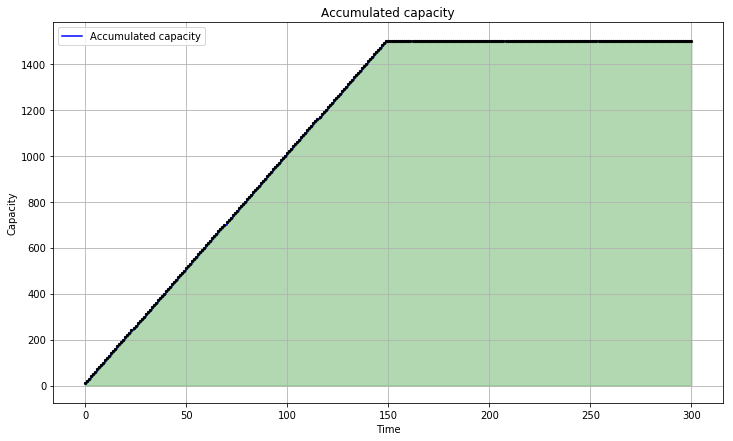

None


In [ ]:
time_interval=300
print(ListSendGrid[0].show_available_capacity_curve(time_interval))
print(ListSendGrid[1].show_available_capacity_curve(time_interval))
print(ListSendGrid[2].show_available_capacity_curve(time_interval))
print(ListSendGrid[3].show_available_capacity_curve(time_interval))